In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
sleep_data = pd.read_csv('/kaggle/input/sleep-record/SEP 2023 - Sleep .csv')

In [30]:
sleep_data.head()

,date,Sleep Calculated by Smart Watch,sleep time,wakeup,deep sleep,light sleep,awake,real sleep,Avg_deep_sleep,Avg_sleep_time,Avg_wake,Avg_light,Avg_awake
0,01/09/2023,5:05:00,23:24:00,04:29:00,1:44:00,3:00:00,0:21:00,4:44:00,NaN,21:50:14,05:17:17,2:02:23,0:28:15
1,02/09/2023,8:07:00,23:31:00,07:38:00,2:20:00,5:26:00,0:21:00,7:46:00,NaN,NaN,NaN,NaN,NaN
2,03/09/2023,5:43:00,22:33:00,04:16:00,2:05:00,3:36:00,0:02:00,5:41:00,NaN,NaN,NaN,NaN,NaN
3,04/09/2023,4:45:00,22:56:00,03:41:00,1:32:00,3:11:00,0:02:00,4:43:00,NaN,NaN,NaN,NaN,NaN
4,05/09/2023,9:26:00,19:31:00,05:07:00,3:35:00,4:45:00,1:06:00,8:20:00,NaN,NaN,NaN,NaN,NaN


In [5]:
sleep_data.describe()

,date,Sleep Calculated by Smart Watch,sleep time,wakeup,deep sleep,light sleep,awake,real sleep,Avg_deep_sleep,Avg_sleep_time,Avg_wake,Avg_light,Avg_awake
count,30,28,30,30,30,30,30,30,1,1,1,1,1
unique,30,27,25,27,23,26,18,26,1,1,1,1,1
top,01/09/2023,4:33:00,21:50:14,03:50:00,2:02:23,2:02:23,0:28:15,4:04:45,2:02:23,21:50:14,05:17:17,2:02:23,0:28:15
freq,1,2,4,2,4,5,5,4,1,1,1,1,1


In [6]:
sleep_data.isnull().sum()

date                                0
Sleep Calculated by Smart Watch     2
sleep time                          0
wakeup                              0
deep sleep                          0
light sleep                         0
awake                               0
real sleep                          0
Avg_deep_sleep                     29
Avg_sleep_time                     29
Avg_wake                           29
Avg_light                          29
Avg_awake                          29
dtype: int64

In [7]:
sleep_data.dtypes

date                               object
Sleep Calculated by Smart Watch    object
sleep time                         object
wakeup                             object
deep sleep                         object
light sleep                        object
awake                              object
real sleep                         object
Avg_deep_sleep                     object
Avg_sleep_time                     object
Avg_wake                           object
Avg_light                          object
Avg_awake                          object
dtype: object

???


In [73]:

sleep_data['date'] = pd.to_datetime(sleep_data['date'], format = '%d/%m/%Y')




In [15]:
sleep_data['date']

0    2023-09-01
1    2023-09-02
2    2023-09-03
3    2023-09-04
4    2023-09-05
5    2023-09-06
6    2023-09-07
7    2023-09-08
8    2023-09-09
9    2023-09-10
10   2023-09-11
11   2023-09-12
12   2023-09-13
13   2023-09-14
14   2023-09-15
15   2023-09-16
16   2023-09-17
17   2023-09-18
18   2023-09-19
19   2023-09-20
20   2023-09-21
21   2023-09-22
22   2023-09-23
23   2023-09-24
24   2023-09-25
25   2023-09-26
26   2023-09-27
27   2023-09-28
28   2023-09-29
29   2023-09-30
Name: date, dtype: datetime64[ns]

In [54]:
sleep_data['Sleep Calculated by Smart Watch'] = pd.to_timedelta(sleep_data['Sleep Calculated by Smart Watch'])

In [17]:
sleep_data['Sleep Calculated by Smart Watch']

0    0 days 05:05:00
1    0 days 08:07:00
2    0 days 05:43:00
3    0 days 04:45:00
4    0 days 09:26:00
5    0 days 04:32:38
6    0 days 05:34:00
7    0 days 05:25:00
8    0 days 07:56:00
9    0 days 06:35:00
10   0 days 10:28:00
11   0 days 08:25:00
12   0 days 08:04:00
13   0 days 05:59:00
14   0 days 06:00:00
15   0 days 07:54:00
16               NaT
17               NaT
18   0 days 08:39:00
19   0 days 04:33:00
20   0 days 04:33:00
21   0 days 07:24:00
22   0 days 08:27:00
23   0 days 03:57:00
24   0 days 03:53:00
25   0 days 06:07:00
26   0 days 08:49:00
27   0 days 08:26:00
28   0 days 09:20:00
29   0 days 09:38:00
Name: Sleep Calculated by Smart Watch, dtype: timedelta64[ns]

In [49]:
sleep_data['sleep time'] = pd.to_datetime(sleep_data['sleep time']).dt.time

/tmp/ipykernel_32/1630313014.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep_data['sleep time'] = pd.to_datetime(sleep_data['sleep time']).dt.time


In [43]:

#The warning message you're seeing is related to the conversion of the 'sleep time' column to a time data type. It's warning you that pandas couldn't infer the format of the time values, so it's using dateutil to parse them individually. While this warning is informational, you can specify the format explicitly to ensure consistent parsing. If your 'sleep time' column is in a specific format like "HH:MM:SS" or "HH:MM," you can provide the format using the format parameter like this:

In [19]:
sleep_data['sleep time'] 

0     23:24:00
1     23:31:00
2     22:33:00
3     22:56:00
4     19:31:00
5     21:50:14
6     22:41:00
7     23:12:00
8     22:22:00
9     22:20:00
10    19:06:00
11    21:48:00
12    22:24:00
13    21:51:00
14    21:58:00
15    22:50:00
16    21:50:14
17    21:50:14
18    22:33:00
19    12:30:00
20    21:50:14
21    22:12:00
22    23:30:00
23    22:44:00
24    23:07:00
25    22:08:00
26    21:37:00
27    21:16:00
28    21:52:00
29    21:48:00
Name: sleep time, dtype: object

In [28]:
sleep_data['wakeup ']

0     04:29:00
1     07:38:00
2     04:16:00
3     03:41:00
4     05:07:00
5     06:00:00
6     04:15:00
7     04:37:00
8     06:18:00
9     04:55:00
10    05:34:00
11    06:13:00
12    06:28:00
13    03:50:00
14    03:58:00
15    06:44:00
16    05:30:00
17    06:00:00
18    07:12:00
19    03:00:00
20    05:17:17
21    05:36:00
22    07:57:00
23    02:41:00
24    03:50:00
25    04:15:00
26    06:26:00
27    05:42:00
28    07:30:00
29    07:26:00
Name: wakeup , dtype: object

In [25]:
sleep_data.columns

Index(['date', 'Sleep Calculated by Smart Watch', 'sleep time', 'wakeup ',
       'deep sleep ', 'light sleep ', 'awake', 'real sleep', 'Avg_deep_sleep',
       'Avg_sleep_time', 'Avg_wake', 'Avg_light', 'Avg_awake'],
      dtype='object')

In [52]:
sleep_data['deep sleep '] = pd.to_timedelta(sleep_data['deep sleep '])  # Convert to timedelta
sleep_data['light sleep '] = pd.to_timedelta(sleep_data['light sleep '])  # Convert to timedelta
sleep_data['awake'] = pd.to_timedelta(sleep_data['awake'])  # Convert to timedelta
sleep_data['real sleep'] = pd.to_timedelta(sleep_data['real sleep'])  # Convert to timedelta
sleep_data['Avg_deep_sleep'] = pd.to_timedelta(sleep_data['Avg_deep_sleep'])  # Convert to timedelta
sleep_data['Avg_sleep_time'] = pd.to_timedelta(sleep_data['Avg_sleep_time'])  # Convert to timedelta
sleep_data['Avg_wake'] = pd.to_timedelta(sleep_data['Avg_wake'])  # Convert to timedelta
sleep_data['Avg_light'] = pd.to_timedelta(sleep_data['Avg_light'])  # Convert to timedelta
sleep_data['Avg_awake'] = pd.to_timedelta(sleep_data['Avg_awake'])  # Convert to timedelta

In [76]:
sleep_data.dtypes

date                                datetime64[ns]
Sleep Calculated by Smart Watch    timedelta64[ns]
sleep time                                  object
wakeup                                      object
deep sleep                         timedelta64[ns]
light sleep                        timedelta64[ns]
awake                              timedelta64[ns]
real sleep                         timedelta64[ns]
Avg_deep_sleep                     timedelta64[ns]
Avg_sleep_time                     timedelta64[ns]
Avg_wake                           timedelta64[ns]
Avg_light                          timedelta64[ns]
Avg_awake                          timedelta64[ns]
dtype: object

In [74]:
sleep_data['date'][0]

Timestamp('2023-09-01 00:00:00')

*Calculate average and median sleep duration*

In [77]:
average_sleep_duration = sleep_data['real sleep'].mean()
median_sleep_duration = sleep_data['real sleep'].median()

In [78]:
average_sleep_duration

Timedelta('0 days 06:18:22.766666666')

In [80]:
median_sleep_duration

Timedelta('0 days 05:49:30')

In [89]:
sleep_data['real_sleep_hours'] = sleep_data['real sleep'].dt.total_seconds()/3600

In [102]:
sleep_data['deep_sleep_hours'] = sleep_data['deep sleep '].dt.total_seconds()/3600
sleep_data['light_sleep_hours'] = sleep_data['light sleep '].dt.total_seconds()/3600
sleep_data['awake_hours'] = sleep_data['awake'].dt.total_seconds()/3600

In [104]:

sleep_data['awake_hours']

0     0.350000
1     0.350000
2     0.033333
3     0.033333
4     1.100000
5     0.470833
6     0.350000
7     0.116667
8     0.000000
9     0.766667
10    1.683333
11    0.516667
12    0.516667
13    0.600000
14    0.166667
15    0.583333
16    0.470833
17    0.470833
18    0.683333
19    0.470833
20    0.470833
21    0.650000
22    0.933333
23    0.000000
24    0.000000
25    0.483333
26    1.050000
27    0.000000
28    0.333333
29    0.000000
Name: awake_hours, dtype: float64

In [105]:
sleep_data['deep_sleep_hours'] 


0     1.733333
1     2.333333
2     2.083333
3     1.533333
4     3.583333
5     2.033333
6     1.733333
7     1.216667
8     2.133333
9     0.850000
10    2.800000
11    2.650000
12    2.766667
13    1.683333
14    1.733333
15    1.683333
16    2.039722
17    2.039722
18    2.066667
19    2.039722
20    2.039722
21    1.416667
22    1.866667
23    1.516667
24    1.833333
25    2.050000
26    1.916667
27    2.766667
28    3.000000
29    2.200000
Name: deep_sleep_hours, dtype: float64

In [106]:
sleep_data['light_sleep_hours'] 

0     3.000000
1     5.433333
2     3.600000
3     3.183333
4     4.750000
5     2.039722
6     3.483333
7     4.083333
8     5.800000
9     4.966667
10    5.983333
11    5.250000
12    4.783333
13    3.700000
14    4.100000
15    5.633333
16    2.039722
17    2.039722
18    5.900000
19    2.039722
20    2.039722
21    5.333333
22    5.650000
23    2.433333
24    2.050000
25    3.583333
26    5.850000
27    5.666667
28    6.000000
29    7.433333
Name: light_sleep_hours, dtype: float64

In [90]:
sleep_data[['real sleep', 'real_sleep_hours']]

,real sleep,real_sleep_hours
0,0 days 04:44:00,4.733333
1,0 days 07:46:00,7.766667
2,0 days 05:41:00,5.683333
3,0 days 04:43:00,4.716667
4,0 days 08:20:00,8.333333
5,0 days 04:04:23,4.073056
6,0 days 05:13:00,5.216667
7,0 days 05:18:00,5.300000
8,0 days 07:56:00,7.933333
9,0 days 05:49:00,5.816667


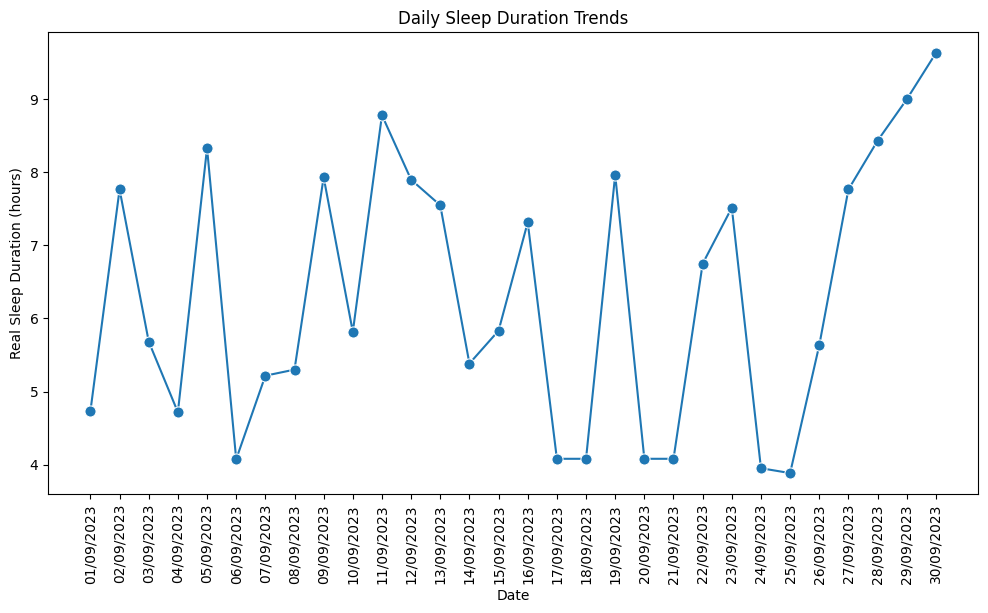

In [100]:
#Create a line plot of sleep duration over time
plt.figure(figsize=(12,6))
sns.lineplot(x = 'date', y = 'real_sleep_hours', data = sleep_data, marker = 'o', markersize= 8)
plt.xlabel('Date')
plt.ylabel('Real Sleep Duration (hours)')
plt.title('Daily Sleep Duration Trends')
plt.xticks(ticks=sleep_data['date'], labels=sleep_data['date'].dt.strftime('%d/%m/%Y'), rotation=90)
# plt.xticks(rotation = 90)



plt.show()


To calculate and visualize the average amount of deep sleep, light sleep, and awake time,

In [108]:
average_deep_sleep = sleep_data['deep_sleep_hours'].mean()
average_light_sleep = sleep_data['light_sleep_hours'].mean()
average_awake_during_sleep = sleep_data['awake_hours'].mean()

In [123]:
def add_value(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i],2))
    

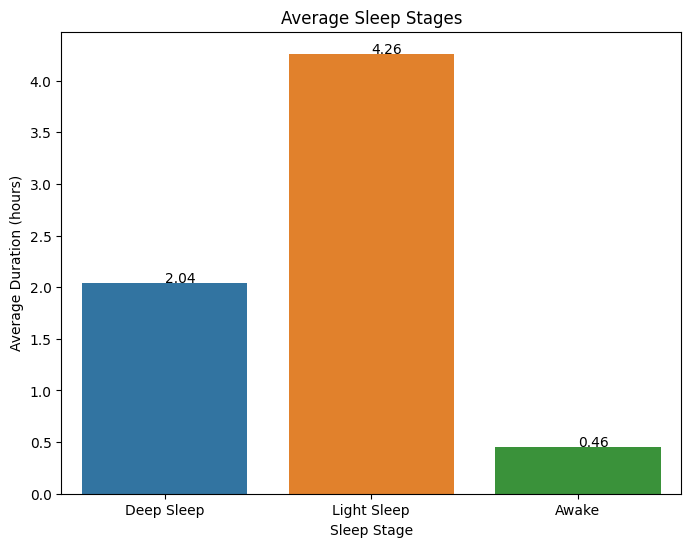

In [124]:
plt.figure(figsize = (8,6))
sns.barplot(x = ['Deep Sleep', 'Light Sleep', 'Awake'], 
           y = [average_deep_sleep, average_light_sleep, average_awake_during_sleep])
plt.xlabel('Sleep Stage')
plt.ylabel('Average Duration (hours)')
plt.title('Average Sleep Stages')
x = ['Deep Sleep', 'Light Sleep', 'Awake']
y = [average_deep_sleep, average_light_sleep, average_awake_during_sleep]

add_value(x,y)


To examine correlations between sleep duration, sleep stages, and other factors like bedtime or wake-up time

In [126]:

correlation_matrix = sleep_data[['real_sleep_hours', 'deep_sleep_hours', 'light_sleep_hours', 'awake_hours']].corr()



Text(0.5, 1.0, 'Correlation Matrix')

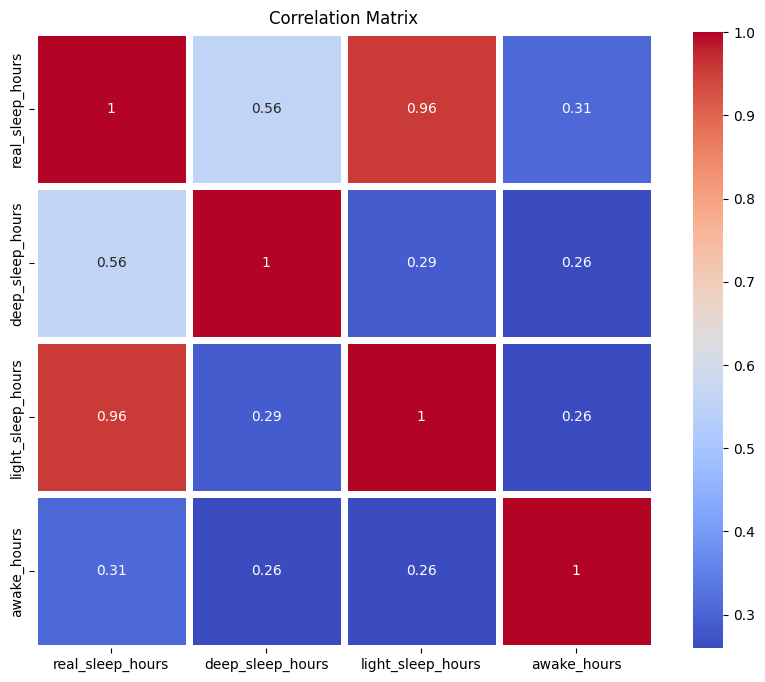

In [127]:
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 5)
plt.title('Correlation Matrix')

????


# To compare sleep patterns between weekends and weekdays

In [128]:
#Convert the date column to the day of the week (e.g., Monday, Tuesday, etc.):

sleep_data['day_of_week'] = sleep_data['date'].dt.strftime('%A')

In [129]:
sleep_data['day_of_week']

0        Friday
1      Saturday
2        Sunday
3        Monday
4       Tuesday
5     Wednesday
6      Thursday
7        Friday
8      Saturday
9        Sunday
10       Monday
11      Tuesday
12    Wednesday
13     Thursday
14       Friday
15     Saturday
16       Sunday
17       Monday
18      Tuesday
19    Wednesday
20     Thursday
21       Friday
22     Saturday
23       Sunday
24       Monday
25      Tuesday
26    Wednesday
27     Thursday
28       Friday
29     Saturday
Name: day_of_week, dtype: object

In [130]:
#Create a new column to indicate whether each day is a weekend or a weekday:

sleep_data['is_weekend'] = sleep_data['day_of_week'].isin(['Saturday', 'Sunday'])

In [131]:
sleep_data['is_weekend']

0     False
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8      True
9      True
10    False
11    False
12    False
13    False
14    False
15     True
16     True
17    False
18    False
19    False
20    False
21    False
22     True
23     True
24    False
25    False
26    False
27    False
28    False
29     True
Name: is_weekend, dtype: bool

In [132]:
sleep_patterns = sleep_data.groupby('is_weekend').agg({
    'real_sleep_hours' : 'mean',
    'deep_sleep_hours' : 'mean',
    'light_sleep_hours' : 'mean',
    'awake_hours' : 'mean'
}).reset_index()

In [135]:
sleep_patterns

,is_weekend,real_sleep_hours,deep_sleep_hours,light_sleep_hours,awake_hours
0,False,6.166376,2.125516,4.040899,0.500794
1,True,6.632870,1.856265,4.776636,0.348611


([<matplotlib.axis.XTick at 0x787a2df3d3c0>,
 [Text(1, 0, 'Weekend'), Text(0, 0, 'Weekday')])

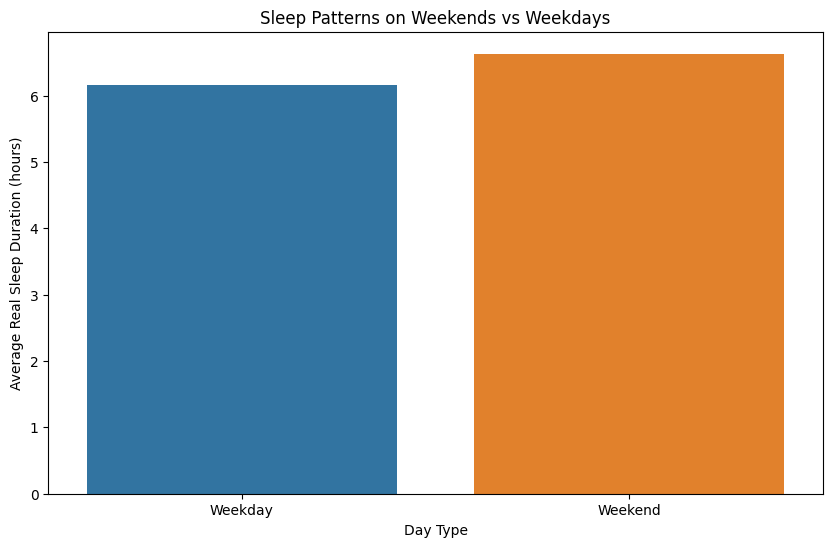

In [136]:
# plot sleep patterns
plt.figure(figsize=(10,6))
sns.barplot(x = 'is_weekend', 
           y = 'real_sleep_hours', 
           data = sleep_patterns, hue_order = [True, False])
plt.xlabel('Day Type')
plt.ylabel('Average Real Sleep Duration (hours)')
plt.title('Sleep Patterns on Weekends vs Weekdays')
plt.xticks([1,0], ['Weekend', 'Weekday'])

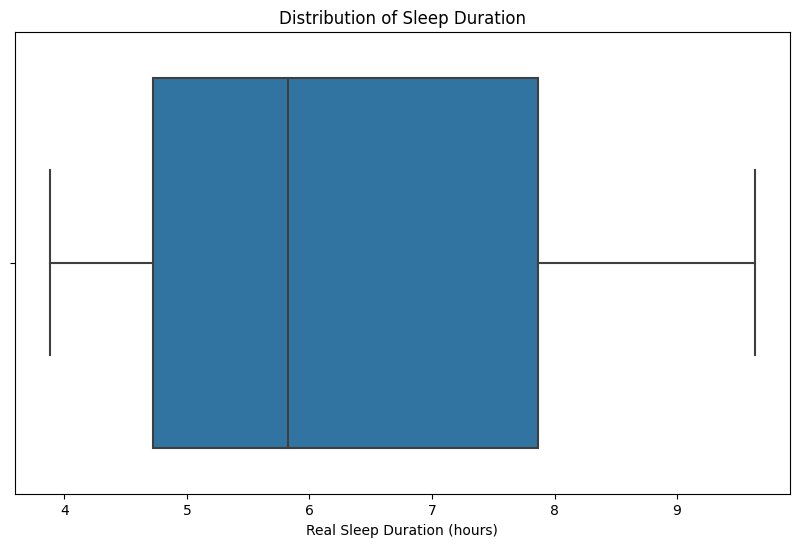

In [137]:
# Create a box plot of sleep duration
plt.figure(figsize=(10, 6))
sns.boxplot(x='real_sleep_hours', data=sleep_data)
plt.xlabel('Real Sleep Duration (hours)')
plt.title('Distribution of Sleep Duration')
plt.show()


In [139]:
Q1 = sleep_data['real_sleep_hours'].quantile(0.25)
Q3 = sleep_data['real_sleep_hours'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = sleep_data[(sleep_data['real_sleep_hours'] < lower_bound) | (sleep_data['real_sleep_hours'] > upper_bound)]

In [149]:
# Calculate whether each night's sleep is good (equal to or greater than average)
sleep_data['good_sleep'] = sleep_data['real_sleep_hours'] >= average_sleep_duration

In [157]:
bedtime_threshold = pd.to_datetime('21:30:00').time()  # Convert 9 PM to a time object

def is_early_bedtime(sleep_time):
    return sleep_time < bedtime_threshold

sleep_data['early_bedtime'] = sleep_data['sleep time'].apply(is_early_bedtime)



In [158]:
# Count the number of nights with good sleep
good_sleep_count = sleep_data['good_sleep'].sum()

# Count the number of nights with an early bedtime
early_bedtime_count = sleep_data['early_bedtime'].sum()

# Calculate the percentage of nights with good sleep
percentage_good_sleep = (good_sleep_count / len(sleep_data)) * 100


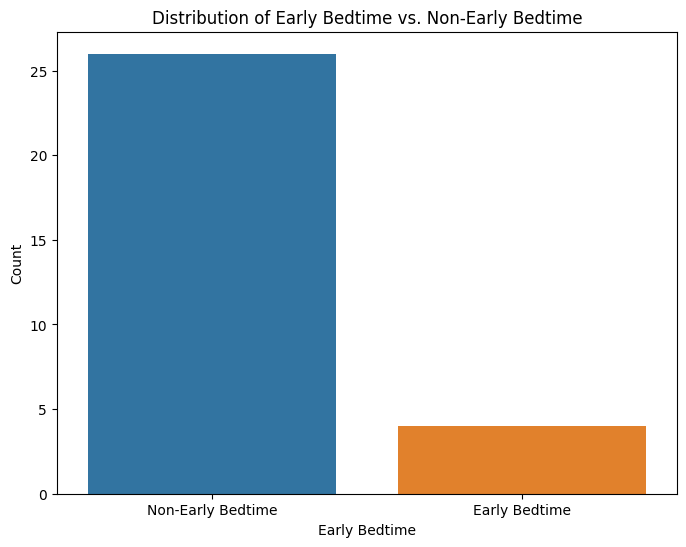

In [159]:
plt.figure(figsize=(8, 6))
sns.countplot(x='early_bedtime', data=sleep_data)
plt.xlabel('Early Bedtime')
plt.ylabel('Count')
plt.title('Distribution of Early Bedtime vs. Non-Early Bedtime')
plt.xticks([0, 1], ['Non-Early Bedtime', 'Early Bedtime'])
plt.show()

In [160]:
crosstab_result = pd.crosstab(sleep_data['early_bedtime'], sleep_data['good_sleep'])


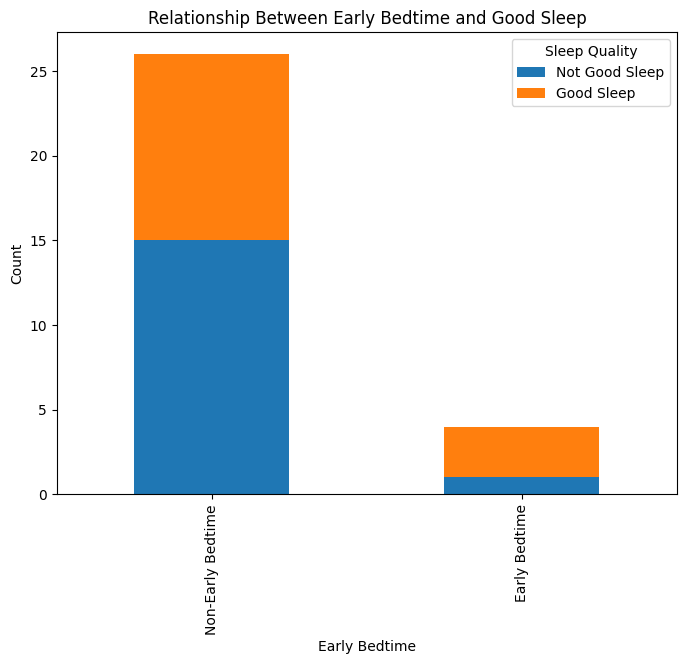

In [161]:
crosstab_result.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Early Bedtime')
plt.ylabel('Count')
plt.title('Relationship Between Early Bedtime and Good Sleep')
plt.xticks([0, 1], ['Non-Early Bedtime', 'Early Bedtime'])
plt.legend(['Not Good Sleep', 'Good Sleep'], title='Sleep Quality')
plt.show()


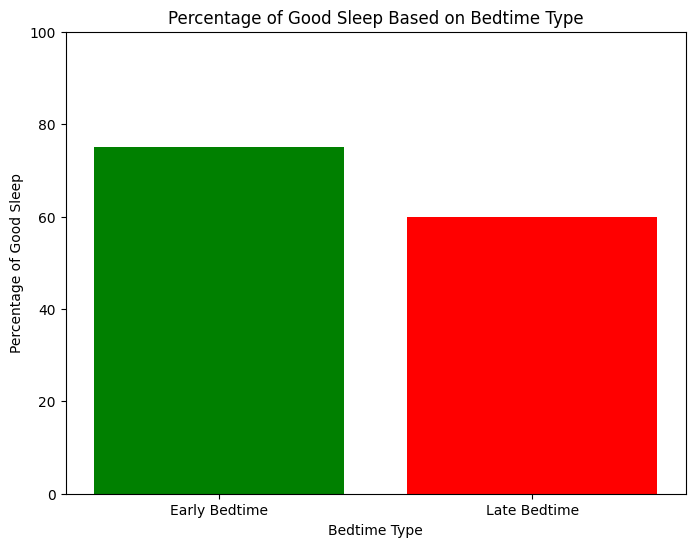

In [165]:
# Assuming you have calculated the percentages:
percentage_early_bedtime_good_sleep = 75  # Replace with your calculated value
percentage_late_bedtime_good_sleep = 60  # Replace with your calculated value

# Create a bar chart
categories = ['Early Bedtime', 'Late Bedtime']
percentages = [percentage_early_bedtime_good_sleep, percentage_late_bedtime_good_sleep]
colors = ['green', 'red']

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=colors)
plt.xlabel('Bedtime Type')
plt.ylabel('Percentage of Good Sleep')
plt.title('Percentage of Good Sleep Based on Bedtime Type')
plt.ylim(0, 100)  # Set the y-axis range to 0-100
plt.show()
